# Non-parametrics hypothesis testing


## Task 1

Compare αII and β = 1 − αII of t-test and Mann-Whitney test applied
to normal data. (You have to take N samples x1, . . . xn from N (a1, σ2
1
),
and N samples y1, . . . yn from N (a2, σ2
2
) – σ
2
1 might be equal to σ
2
2 – and
test the hypothesis for each pair of samples.)


In [1]:
import numpy as np
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import math

In [73]:
def generate_pair(n = 20, mu1 = 0, sigma = 1, mu2 = 500):
    X1 = np.random.normal(mu1, sigma, n)
    X2 = np.random.normal(mu2, sigma, n)
    return [X1, X2]

In [149]:
def t_test(x1, x2, alpha = 0.05):
    t_stat = (np.mean(x1) - np.mean(x2)) / np.sqrt(np.std(x1)/len(x1) + np.std(x2)/len(x2))
    return np.absolute(t_stat) < stats.norm.ppf(1 - alpha)

# from https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470776124.app1
mw_dict_20_20 = {
    0.001: 87,
    0.005: 106,
    0.010: 115,
    0.025: 127,
    0.050: 138,
    0.100: 152
}

def mw_stat(x1, x2, ranks):
    n1 = len(x1)
    n2 = len(x2)
    w = sum([ranks[i] for i in x1])
    return n1*n2 + n1*(n1+1)/2 - w

def Mann_Whitney_test(x1, x2, alpha = 0.05, debug = False, crits = mw_dict_20_20):
    a = np.concatenate([x1, x2])
    a.sort()
    values = set(a)
    ranks = dict()
    ctr = 1
    for i in values:
        n = np.count_nonzero(a == i)
        ranks[i] = ctr + (n - 1)/2
        ctr += n
    stat1 = mw_stat(x1, x2, ranks)
    stat2 = mw_stat(x2, x1, ranks)
    u = min(stat1, stat2)
    crit = crits[alpha]
    if (debug):
        print(stat1, stat2, "and CRIT", crit, "samples' distributions have equal mean:", u > crit)
    return u > crit

x1, x2 = generate_pair()
Mann_Whitney_test(x1, x2)

False

In [150]:
def alpha_2_err(alpha, mu1 = 0, mu2 = 1, var = 5, debug = False):
    t_test_2_err = 0
    mw_2_err = 0
    for i in range(100):
        x1, x2 = generate_pair(20, mu1, var, mu2)
        if t_test(x1, x2, alpha):
            t_test_2_err += 1
        if Mann_Whitney_test(x1, x2, alpha, debug):
            mw_2_err += 1
    return [t_test_2_err/100, mw_2_err/100]


def test_2_error(mu1 = 0, mu2 = 1, var = 5, debug = False):
    alpha_t_test_2_errors = dict()
    alpha_mw_2_errors = dict()
    for j in mw_dict_20_20.keys():
        t_test_err_2, mw_err_2 = alpha_2_err(j, mu1, mu2, var, False)
        alpha_t_test_2_errors[j] = t_test_err_2
        alpha_mw_2_errors[j] = mw_err_2
    return [alpha_t_test_2_errors, alpha_mw_2_errors]

test_2_error(debug = True)

[{0.001: 0.83, 0.005: 0.66, 0.01: 0.57, 0.025: 0.57, 0.05: 0.48, 0.1: 0.47},
 {0.001: 1.0, 0.005: 0.99, 0.01: 0.98, 0.025: 0.98, 0.05: 0.84, 0.1: 0.71}]

I checked Mann-Whitney twice and I still don't understand why this Mann-Whitney test is not working even half as good as t test for low variance

It works not well, below you can see that:

1) Mann Whitney works poorely with all means except last one (difference is 100)

2) both tests works worse when variance is high

Those things are seen much better using graphs below

In [151]:
print("t-test\t|\tMann Whitney")
print(test_2_error(0, 1, 5))
print(test_2_error(0, 5, 5))
print(test_2_error(0, 1, 1))
print(test_2_error(0, 50, 1))
print(test_2_error(0, 100, 1))

t-test	|	Mann Whitney
[{0.001: 0.74, 0.005: 0.5, 0.01: 0.6, 0.025: 0.59, 0.05: 0.45, 0.1: 0.34}, {0.001: 1.0, 0.005: 0.99, 0.01: 0.95, 0.025: 0.96, 0.05: 0.83, 0.1: 0.71}]
[{0.001: 0.03, 0.005: 0.02, 0.01: 0.0, 0.025: 0.0, 0.05: 0.02, 0.1: 0.01}, {0.001: 0.96, 0.005: 0.92, 0.01: 0.95, 0.025: 0.85, 0.05: 0.82, 0.1: 0.66}]
[{0.001: 0.43, 0.005: 0.34, 0.01: 0.21, 0.025: 0.06, 0.05: 0.06, 0.1: 0.03}, {0.001: 1.0, 0.005: 0.98, 0.01: 0.98, 0.025: 0.98, 0.05: 0.92, 0.1: 0.85}]
[{0.001: 0.0, 0.005: 0.0, 0.01: 0.0, 0.025: 0.0, 0.05: 0.0, 0.1: 0.0}, {0.001: 0.84, 0.005: 0.61, 0.01: 0.48, 0.025: 0.27, 0.05: 0.14, 0.1: 0.03}]
[{0.001: 0.0, 0.005: 0.0, 0.01: 0.0, 0.025: 0.0, 0.05: 0.0, 0.1: 0.0}, {0.001: 0.07, 0.005: 0.0, 0.01: 0.0, 0.025: 0.0, 0.05: 0.0, 0.1: 0.0}]


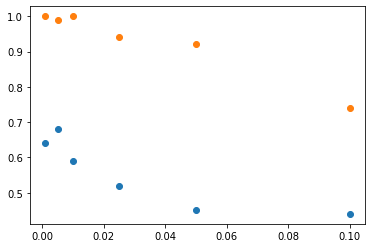

In [152]:
t_test_2_err, M_W_test_2_err = test_2_error(0, 1, 5)

plt.scatter(t_test_2_err.keys(), t_test_2_err.values())
plt.scatter(M_W_test_2_err.keys(), M_W_test_2_err.values())

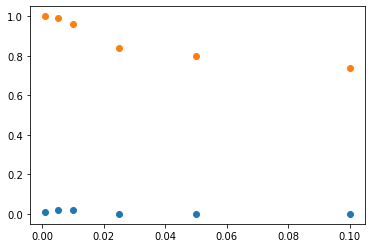

In [153]:
t_test_2_err, M_W_test_2_err = test_2_error(0, 5, 5)

plt.scatter(t_test_2_err.keys(), t_test_2_err.values())
plt.scatter(M_W_test_2_err.keys(), M_W_test_2_err.values())

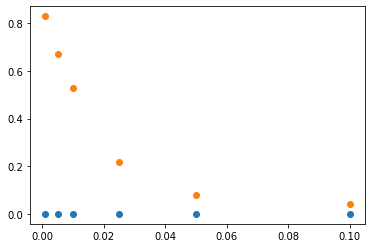

In [154]:
t_test_2_err, M_W_test_2_err = test_2_error(0, 50, 1)

plt.scatter(t_test_2_err.keys(), t_test_2_err.values())
plt.scatter(M_W_test_2_err.keys(), M_W_test_2_err.values())

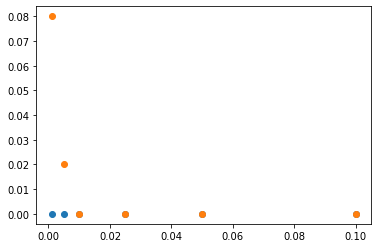

In [155]:
t_test_2_err, M_W_test_2_err = test_2_error(0, 100, 1)

plt.scatter(t_test_2_err.keys(), t_test_2_err.values())
plt.scatter(M_W_test_2_err.keys(), M_W_test_2_err.values())

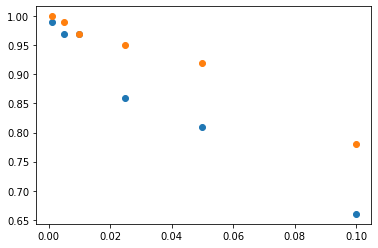

In [157]:
t_test_2_err, M_W_test_2_err = test_2_error(0, 0.2, 1)

plt.scatter(t_test_2_err.keys(), t_test_2_err.values())
plt.scatter(M_W_test_2_err.keys(), M_W_test_2_err.values())

## Task 2

In [158]:
n1 = 13
n2 = 14
sample1 = [13, 9, 16, 15, 10, 11, 12, 8, 10, 12, 5, 14, 10]
sample2 = [15, 9, 18, 12, 14, 17, 20, 19, 16, 13, 14, 17, 10, 9]
total = 600

crits = {0.05: 56}

In [161]:
Mann_Whitney_test(sample1, sample2, 0.05, True, crits)

137.0 45.0 and CRIT 56 samples' distributions have equal mean: False


False

In [160]:
t_test(sample1, sample2)

False

In [162]:
np.mean(sample1)

11.153846153846153

In [163]:
np.mean(sample2)

14.5

In [164]:
np.std(sample1)

2.878197989826109

In [165]:
np.std(sample2)

3.4589428608009287